Building user-based recommendation model for Amazon.

Project 3

DESCRIPTION

The dataset provided contains movie reviews given by Amazon customers. Reviews were given between May 1996 and July 2014.

Data Dictionary
UserID – 4848 customers who provided a rating for each movie
Movie 1 to Movie 206 – 206 movies for which ratings are provided by 4848 distinct users

Data Considerations
- All the users have not watched all the movies and therefore, all movies are not rated. These missing values are represented by NA.
- Ratings are on a scale of -1 to 10 where -1 is the least rating and 10 is the best.

Analysis Task
- Exploratory Data Analysis:

    Which movies have maximum views/ratings?
    What is the average rating for each movie? Define the top 5 movies with the maximum ratings.
    Define the top 5 movies with the least audience.

- Recommendation Model: Some of the movies hadn’t been watched and therefore, are not rated by the users. Netflix would like to take this as an opportunity and build a machine learning recommendation algorithm which provides the ratings for each of the users.

    Divide the data into training and test data
    Build a recommendation model on training data
    Make predictions on the test data


In [93]:
# Importing libraries

#Data Analysis libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning Libraries
import sklearn

In [44]:
#Important to get multiple outputs in same cell window
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [45]:
df = pd.read_csv('J:/Simplii Learn DS/Machine Learning/Dataset for Project/Amazon - Movies and TV Ratings.csv')
df.head(10)

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AP57WZ2X4G0AA,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,A3NMBJ2LCRCATT,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,A5Y15SAOMX6XA,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,A3P671HJ32TCSF,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,A3VCKTRD24BG7K,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df.shape

(4848, 207)

### Checking for missing data

In [47]:
df.isnull().sum()

user_id        0
Movie1      4847
Movie2      4847
Movie3      4847
Movie4      4846
Movie5      4819
Movie6      4847
Movie7      4847
Movie8      4847
Movie9      4847
Movie10     4847
Movie11     4846
Movie12     4843
Movie13     4847
Movie14     4847
Movie15     4847
Movie16     4528
Movie17     4847
Movie18     4847
Movie19     4846
Movie20     4847
Movie21     4847
Movie22     4846
Movie23     4845
Movie24     4843
Movie25     4847
Movie26     4845
Movie27     4847
Movie28     4845
Movie29     4605
Movie30     4846
Movie31     4846
Movie32     4846
Movie33     4847
Movie34     4847
Movie35     4847
Movie36     4847
Movie37     4847
Movie38     4847
Movie39     4844
Movie40     4845
Movie41     4847
Movie42     4847
Movie43     4841
Movie44     4846
Movie45     4847
Movie46     4847
Movie47     4847
Movie48     4847
Movie49     4847
Movie50     4847
Movie51     4846
Movie52     4831
Movie53     4845
Movie54     4847
Movie55     4847
Movie56     4847
Movie57     4847
Movie58     48

Changing Nan values to 0.

In [48]:
df.fillna(0, inplace=True)
df.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AH3QC2PC1VTGP,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A3LKP6WPMP9UKX,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AVIY68KEPQ5ZD,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A1CV1WROP5KTTW,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- Exploratory Data Analysis:

  *  Which movies have maximum views/ratings?
  *  What is the average rating for each movie? Define the top 5 movies with the maximum ratings.
  *  Define the top 5 movies with the least audience.


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4848 entries, 0 to 4847
Columns: 207 entries, user_id to Movie206
dtypes: float64(206), object(1)
memory usage: 7.7+ MB


In [50]:
df.describe()

,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
count,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,...,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000
mean,0.001031,0.001031,0.000413,0.002063,0.024546,0.000825,0.001031,0.001031,0.001031,0.001031,...,0.003919,0.002063,0.001031,0.007632,0.002682,0.005363,0.000619,0.007219,0.033416,0.013201
std,0.071811,0.071811,0.028724,0.101545,0.336268,0.057448,0.071811,0.071811,0.071811,0.071811,...,0.130800,0.101545,0.071811,0.188769,0.110296,0.161142,0.043086,0.185478,0.399243,0.254991
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,5.000000,2.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000


### Checking total values/counting values in all columns

In [51]:
# count_values = []s
e = pd.DataFrame(columns=['Column', 'Value_Counts'])

for data in df: 
    x = df[data].count()
    e = e.append({'Column': data, 'Value_Counts': x}, ignore_index=True)
#         d = pd.DataFrame(data = {'Column': data, 'Value_Counts': x}, index=[0])
        
e

,Column,Value_Counts
0,user_id,4848
1,Movie1,4848
2,Movie2,4848
3,Movie3,4848
4,Movie4,4848
5,Movie5,4848
6,Movie6,4848
7,Movie7,4848
8,Movie8,4848
9,Movie9,4848


In [52]:
df.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AH3QC2PC1VTGP,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A3LKP6WPMP9UKX,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AVIY68KEPQ5ZD,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A1CV1WROP5KTTW,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Adding reviews of all users on all movies and finding top 10 movies

In [55]:
rating_total = df.sum().drop('user_id')
rating_total_df = rating_total.to_frame().reset_index()


In [56]:
rating_total_df = rating_total_df.rename(columns={"index": "Movies", 0: "Rating_total"})
rating_total_df.head()

,Movies,Rating_total
0,Movie1,5.0
1,Movie2,5.0
2,Movie3,2.0
3,Movie4,10.0
4,Movie5,119.0


In [57]:
type(rating_total_df)

pandas.core.frame.DataFrame

Finding the highest rated movies

In [58]:
max = rating_total_df.Rating_total.max()
max

9511.0

In [59]:
rating_total_df.sort_values(by='Rating_total', ascending=False).head(1)

,Movies,Rating_total
126,Movie127,9511.0


In [60]:
rating_total_df.columns

Index(['Movies', 'Rating_total'], dtype='object')

[Text(0.5, 1.0, 'Ratings Plot')]

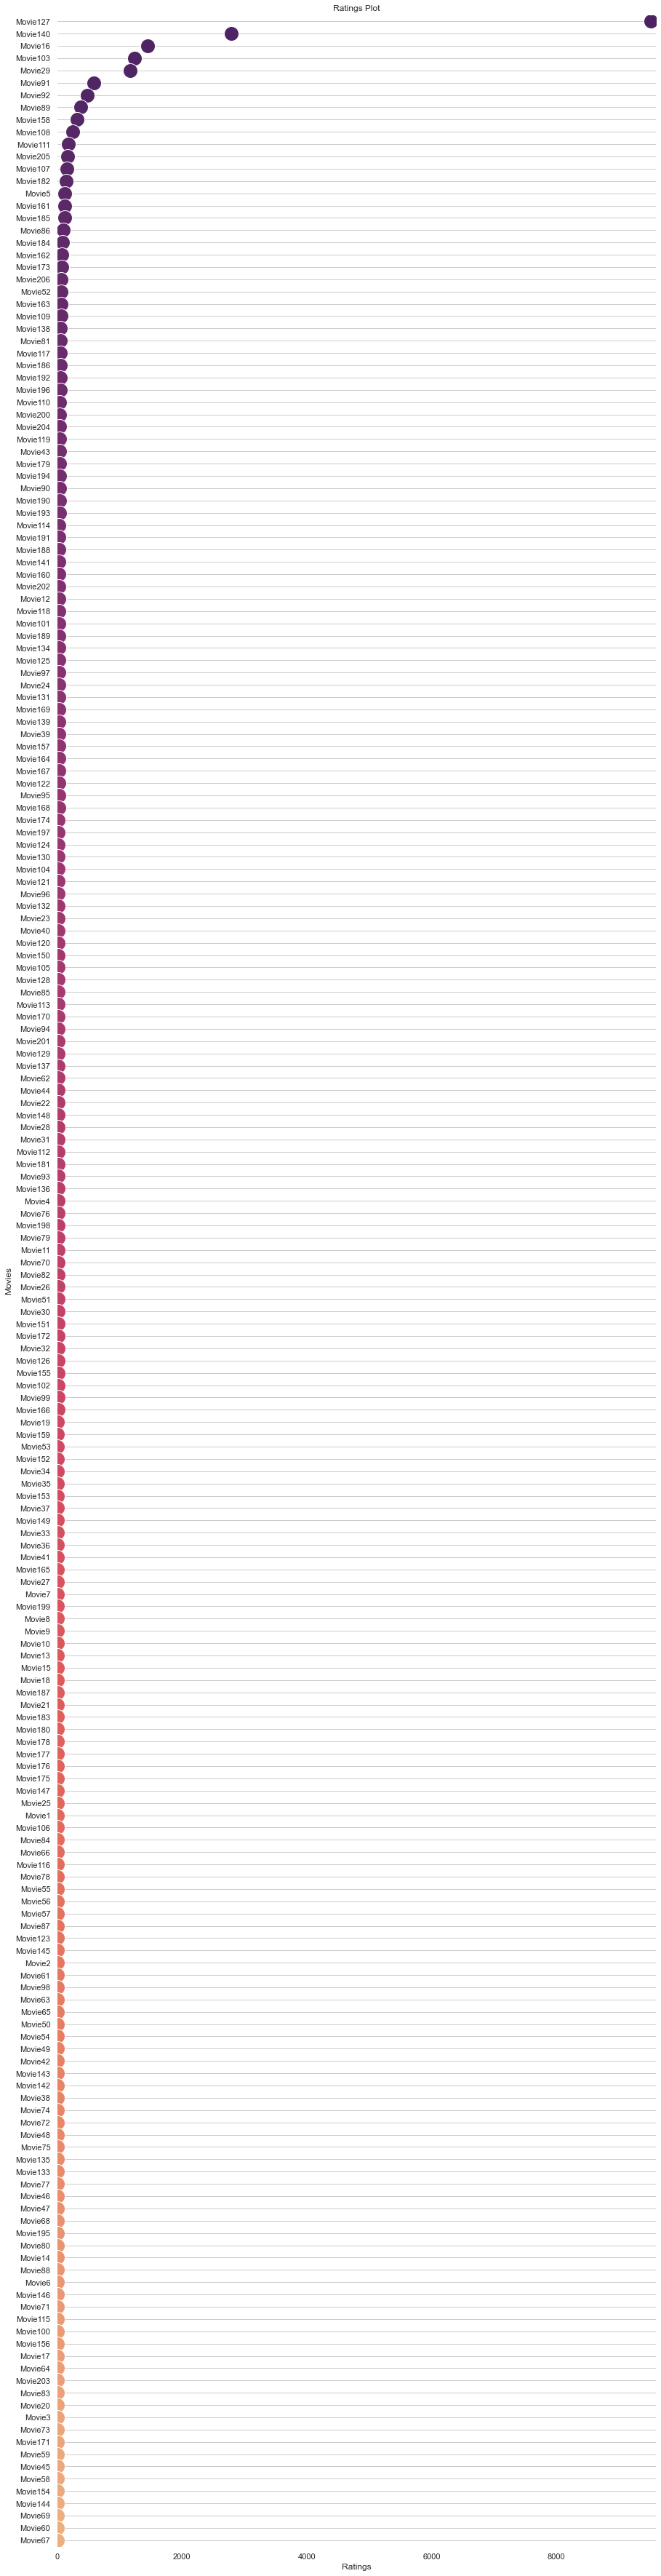

In [62]:
sns.set_theme(style="whitegrid")

g = sns.PairGrid(rating_total_df.sort_values("Rating_total", ascending=False), 
                 x_vars=rating_total_df.columns[1], y_vars=["Movies"], 
                 height=50, aspect=.25)

g.map(sns.stripplot, size=20, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

g.set(xlim=(0, 9600), xlabel="Ratings", ylabel="Movies")

titles = ["Ratings Plot"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

Hence 'Movie127' has the highest ratings of 9511.

The average rating of all movies. 

In [65]:
rating_total_df.mean()

Rating_total    106.446602
dtype: float64

the top 5 movies with the maximum ratings.

In [66]:
rating_total_df.sort_values(by='Rating_total',ascending=False).head(5)

,Movies,Rating_total
126,Movie127,9511.0
139,Movie140,2794.0
15,Movie16,1446.0
102,Movie103,1241.0
28,Movie29,1168.0


Define the top 5 movies with the least audience.

In [67]:
rating_total_df.sort_values(by='Rating_total',ascending=False).tail(5)

,Movies,Rating_total
153,Movie154,1.0
143,Movie144,1.0
68,Movie69,1.0
59,Movie60,1.0
66,Movie67,1.0


- Recommendation Model: Some of the movies hadn’t been watched and therefore, are not rated by the users. Netflix would like to take this as an opportunity and build a machine learning recommendation algorithm which provides the ratings for each of the users.

    Divide the data into training and test data
    Build a recommendation model on training data
    Make predictions on the test data.


### Creating Recommendation Systems using Nearest Neighbors

In [68]:
df.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AH3QC2PC1VTGP,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A3LKP6WPMP9UKX,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AVIY68KEPQ5ZD,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A1CV1WROP5KTTW,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
# df.drop('user_id', axis = 1, inplace = True)

# df.drop(labels=['user_id'], axis=1, inplace = True)
# df.insert(0,'user_id',mid)
# df.fillna(0, inplace = True)
df['user_id'] = range(1,len(df)+1)
mid = df['user_id']
x = df.set_index(mid)

x.drop(labels=['user_id'], axis=1, inplace = True)
x.head(10)

,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
df.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,1,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
transpose = x.T
index = transpose.index
index.name = "Movies"
transpose.head(10)

user_id,1,2,3,4,5,6,7,8,9,10,...,4839,4840,4841,4842,4843,4844,4845,4846,4847,4848
Movies,,,,,,,,,,,,,,,,,,,,,
Movie1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie2,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie3,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie4,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie5,0.0,0.0,0.0,0.0,5.0,2.0,5.0,2.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
transpose.shape

(206, 4848)

First changing our dataframe into array and applying k-nearest neighbours

In [87]:
from scipy.sparse import csr_matrix

transpose_matrix = csr_matrix(transpose.values)

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(transpose_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [88]:
transpose_matrix

<206x4848 sparse matrix of type '<class 'numpy.float64'>'
	with 5000 stored elements in Compressed Sparse Row format>

In [91]:
# picking up a movie to generate recommendations for it using np.random.choice
query_index = np.random.choice(transpose.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(transpose.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)
print(distances)
print(indices)

165
[[2.22044605e-16 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00]]
[[165 137 135 139 138 141]]


In [92]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(transpose.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, transpose.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Movie166:

1: Movie138, with distance of 1.0:
2: Movie136, with distance of 1.0:
3: Movie140, with distance of 1.0:
4: Movie139, with distance of 1.0:
5: Movie142, with distance of 1.0:


## Cosine Similarity
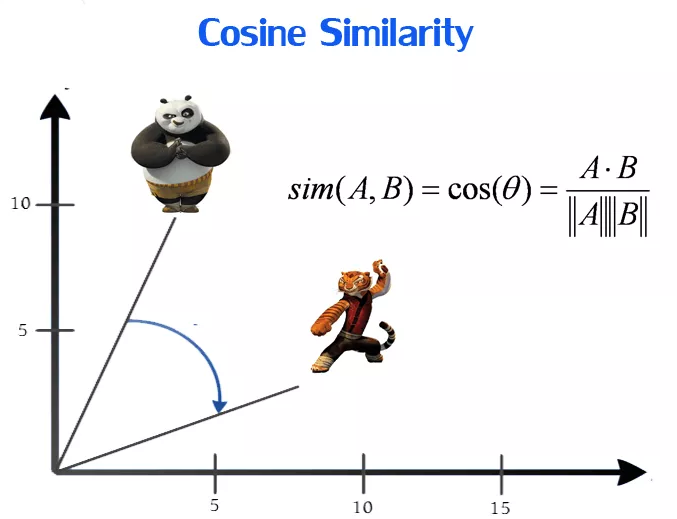


# Conclusion

As our task we have found recommendations for any movie using k-nearest neighbours, euclidean distance and cosine similarity. In particular, our algorithms is making correlations from a movie to other movies in our data to find best recommendations considering ratings.